In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('feature_enginering.csv')

In [11]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_to_loan,net_disposable_income
0,22.0,Female,Master,71948.0,0,Rent,35000.0,Personal,16.02,0.49,3.0,561,No,1,2.055657,66341.00
1,21.0,Female,High School,12282.0,0,Own,1000.0,Education,11.14,0.08,2.0,504,Yes,0,12.282000,12170.60
2,25.0,Female,High School,12438.0,3,Mortgage,5500.0,Medical,12.87,0.44,3.0,635,No,1,2.261455,11730.15
3,23.0,Female,Bachelor,79753.0,0,Rent,35000.0,Medical,15.23,0.44,2.0,675,No,1,2.278657,74422.50
4,24.0,Male,Master,66135.0,1,Rent,35000.0,Medical,14.27,0.53,4.0,586,No,1,1.889571,61140.50


In [12]:
# apply label encoder
columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
encoders = {}
for column in columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder
    print(f"Mapping for {column}:") 
    # mapping of the data
    for class_, index_ in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)): 
        print(f"{class_} -> {index_}")

Mapping for person_gender:
Female -> 0
Male -> 1
Mapping for person_education:
Associate -> 0
Bachelor -> 1
Doctorate -> 2
High School -> 3
Master -> 4
Mapping for person_home_ownership:
Mortgage -> 0
Other -> 1
Own -> 2
Rent -> 3
Mapping for loan_intent:
Debtconsolidation -> 0
Education -> 1
Homeimprovement -> 2
Medical -> 3
Personal -> 4
Venture -> 5
Mapping for previous_loan_defaults_on_file:
No -> 0
Yes -> 1


In [13]:
# save the encoding
with open('encoders.pkl', 'wb') as encoder_file: 
    pkl.dump(encoders, encoder_file)

In [14]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_to_loan,net_disposable_income
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1,2.055657,66341.00
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0,12.282000,12170.60
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1,2.261455,11730.15
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1,2.278657,74422.50
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1,1.889571,61140.50


In [ ]:
df.dtypes

In [15]:
# standarization
columns = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score', 'income_to_loan', 'net_disposable_income']]
scaler = StandardScaler()
columns = scaler.fit_transform(columns)

df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score', 'income_to_loan', 'net_disposable_income']] = columns

In [16]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_to_loan,net_disposable_income
0,-0.972715,0,4,-0.125715,0,3,4.025004,4,1.682992,0.49,-0.739351,-1.420299,0,1,-0.642400,-0.197890
1,-1.141929,0,3,-1.067987,0,2,-1.359230,1,0.044832,0.08,-0.997275,-2.551210,1,0,0.031205,-1.056489
2,-0.465073,0,3,-1.065523,3,0,-0.646611,3,0.625573,0.44,-0.739351,0.047901,0,1,-0.628845,-1.063470
3,-0.803501,0,1,-0.002455,0,3,4.025004,3,1.417798,0.44,-0.997275,0.841522,0,1,-0.627712,-0.069798
4,-0.634287,1,4,-0.217516,1,3,4.025004,3,1.095537,0.53,-0.481428,-0.924286,0,1,-0.653341,-0.280317


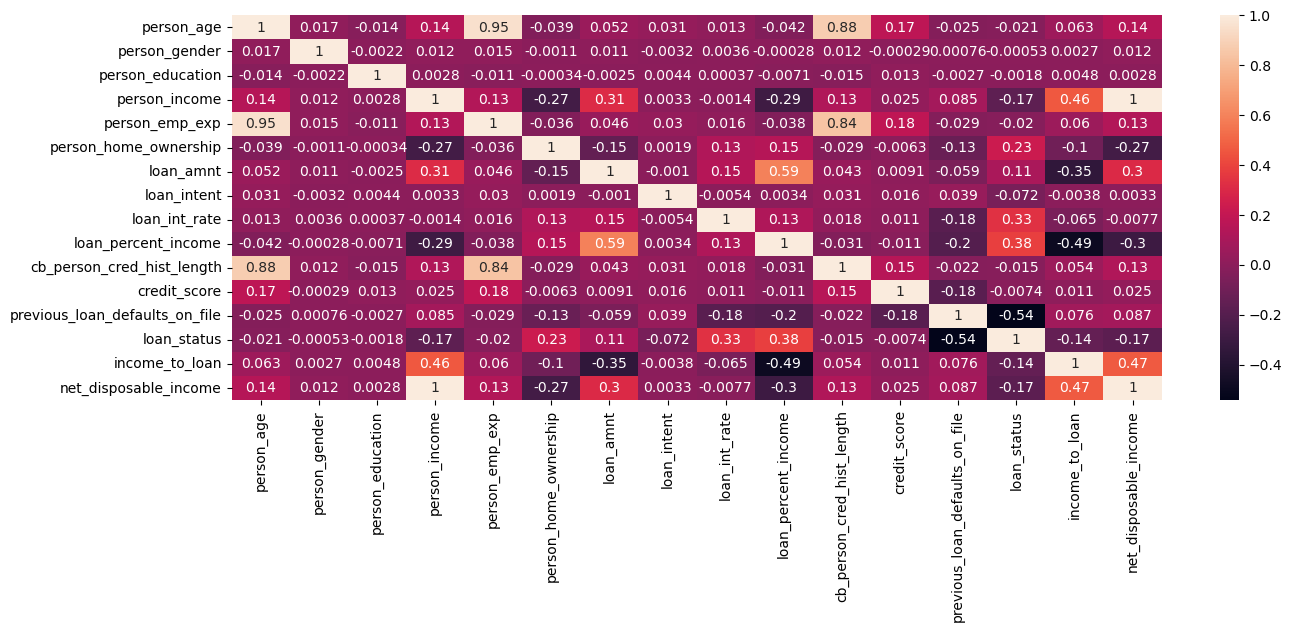

In [28]:
# heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
df.to_csv('processed_data.csv', index=False)